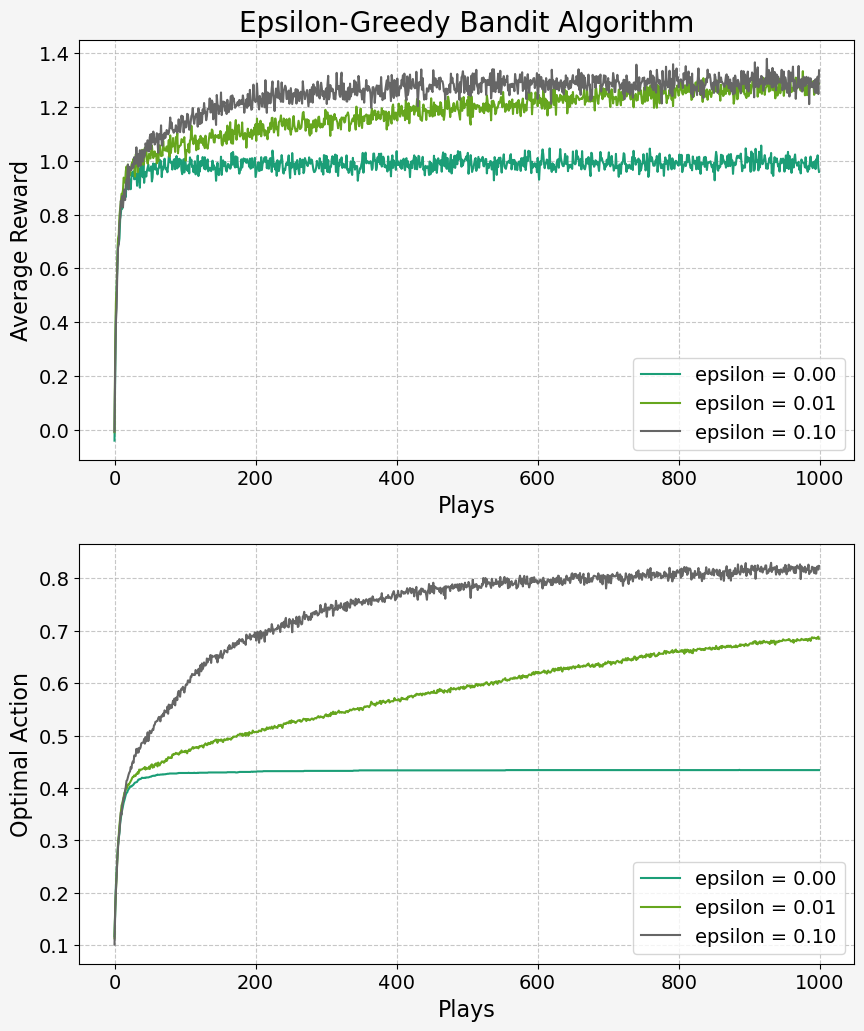

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# set the random seed to ensure reproducibility of results
np.random.seed(20)

class MultiArmedBandit:
    def __init__(self, n_arms):
        
        # Initializes the Multi-Armed Bandit instance with the number of arms and
        # sets the expected reward for each arm to be a random value drawn from a 
        # normal distribution with a mean of 0 and standard deviation of 1
        self.n_arms = n_arms
        self.expected_reward = np.random.normal(0, 1, self.n_arms)
        
        # Initializes the action count for each arm to 0 and action values to 0
        self.action_counts = np.zeros(self.n_arms)
        self.action_values = np.zeros(self.n_arms)

    def pull_arm(self, action):
        
        # Returns the reward obtained from pulling the arm (i.e., taking the action).
        # The reward is a random value drawn from a normal distribution with a mean
        # equal to the expected reward of the selected arm and a standard deviation of 1.
        return np.random.normal(self.expected_reward[action], 1)

    def update_action_values(self, action, reward):
        
        # Updates the action count for the selected arm and calculates the step size
        # used to update the action value. The step size is 1 divided by the action count.
        # The action value is then updated using the step size and the difference between
        # the reward obtained and the current action value for the selected arm.
        self.action_counts[action] += 1
        step_size = 1/self.action_counts[action]
        self.action_values[action] += step_size * (reward - self.action_values[action])

    def choose_action(self, epsilon):
        
        # Selects an action to take based on the epsilon-greedy policy. If a random value
        # drawn from a uniform distribution between 0 and 1 is less than epsilon, a random
        # action is selected. Otherwise, the action with the highest action value is chosen.
        if np.random.random() < epsilon:
            return np.random.randint(self.n_arms)
        else:
            return np.argmax(self.action_values)


def experiment(n_bandits, n_steps, n_arms, epsilons):
    
    # Initialize arrays to hold the rewards and optimal actions for each epsilon
    rewards = np.zeros((len(epsilons), n_steps))
    optimal_actions = np.zeros((len(epsilons), n_steps))
    
    # Loop over each epsilon and each bandit
    for i, epsilon in enumerate(epsilons):
        for j in range(n_bandits):
            
            # Initialize a new multi-armed bandit for each iteration
            bandit = MultiArmedBandit(n_arms)
            
            # Initialize arrays to hold the rewards and optimal actions for this bandit
            bandit_rewards = np.zeros(n_steps)
            bandit_optimal_actions = np.zeros(n_steps)
            
            # Determine the optimal action for this bandit
            optimal_action = np.argmax(bandit.expected_reward)
            
            # Loop over each step
            for step in range(n_steps):
                
                # Choose an action using the epsilon-greedy strategy
                action = bandit.choose_action(epsilon)
                
                # Get the reward for the chosen action
                reward = bandit.pull_arm(action)
                
                # Update the action value estimates
                bandit.update_action_values(action, reward)
                
                # Store the reward in the rewards array
                bandit_rewards[step] = reward
                
                # Check if the chosen action is optimal
                if action == optimal_action:
                    bandit_optimal_actions[step] = 1
                
            # Add the bandit's rewards and optimal actions to the overall arrays
            rewards[i] += bandit_rewards
            optimal_actions[i] += bandit_optimal_actions
    
    # Average the rewards and optimal actions over all bandits
    rewards /= n_bandits
    optimal_actions /= n_bandits
    
    # Return the rewards and optimal actions arrays
    return rewards, optimal_actions


n_bandits = 2000
n_steps = 1000
n_arms = 8
epsilons = [0, 0.01, 0.1]

rewards, optimal_actions = experiment(n_bandits, n_steps, n_arms, epsilons)

# define the figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# plot average rewards
axs[0].set_title("Epsilon-Greedy Bandit Algorithm", fontsize=20)
axs[0].set_xlabel("Plays", fontsize=16)
axs[0].set_ylabel("Average Reward", fontsize=16)
axs[0].tick_params(axis="both", labelsize=14)
axs[0].grid(linestyle='--', alpha=0.7)
colors = plt.cm.get_cmap('Dark2')(np.linspace(0, 1, len(epsilons)))
for i, epsilon in enumerate(epsilons):
    axs[0].plot(rewards[i], label='epsilon = %.02f' % epsilon, lw=1.5, color=colors[i])
axs[0].legend(fontsize=14)

# plot optimal actions
axs[1].set_xlabel('Plays', fontsize=16)
axs[1].set_ylabel('Optimal Action', fontsize=16)
axs[1].tick_params(axis='both', labelsize=14)
axs[1].grid(linestyle='--', alpha=0.7)
for i, epsilon in enumerate(epsilons):
    axs[1].plot(optimal_actions[i], label='epsilon = %.02f' % epsilon, lw=1.5, color=colors[i])
axs[1].legend(fontsize=14)

# add background color
fig.patch.set_facecolor('#F5F5F5')
axs[0].set_facecolor('#FFFFFF')
axs[1].set_facecolor('#FFFFFF')

plt.show()